In [1]:
# downgrade numpy and scikit-image because of deprecated function '_validate_lengths'
!pip uninstall -y scikit-image
!pip install scikit-image==0.14.2 && pip install numpy==1.15


Uninstalling scikit-image-0.16.2:
  Successfully uninstalled scikit-image-0.16.2
     |████████████████████████████████| 25.3MB 127kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 13.9MB 241kB/s 
ERROR: tensorflow 1.15.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.15.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.15.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: astropy 4.0 has requirement numpy>=1.16, but you'll have numpy 1.15.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.5
    Uninstalling numpy-1.17.5:
      Successfully uninstalled numpy-1.17.5


In [2]:
import os
%cd /content
!git clone https://github.com/BenjaminWegener/RCAN-tf
%cd RCAN-tf
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15F7pQlg-WqCXLeqsb2UXwfLl1t-okLNq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15F7pQlg-WqCXLeqsb2UXwfLl1t-okLNq" -O rcan_model.tar && rm -rf /tmp/cookies.txt

/content
Cloning into 'RCAN-tf'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 68 (delta 20), reused 41 (delta 8), pack-reused 0
Unpacking objects: 100% (68/68), done.
/content/RCAN-tf
--2020-01-29 09:04:42--  https://docs.google.com/uc?export=download&confirm=TqmQ&id=15F7pQlg-WqCXLeqsb2UXwfLl1t-okLNq
Resolving docs.google.com (docs.google.com)... 74.125.142.138, 74.125.142.139, 74.125.142.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k0l79veu4hj3jnd103dtv5rr6evp4d1m/1580284800000/11733399016492606736/*/15F7pQlg-WqCXLeqsb2UXwfLl1t-okLNq?e=download [following]
--2020-01-29 09:04:42--  https://doc-00-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k0l7

In [3]:
!tar -xvf rcan_model.tar

RCAN_X4.data-00000-of-00001
RCAN_X4.index


In [4]:
!rm -rf ./images/.ipynb_checkpoints/
!python main.py --mode test_only --pre_trained_model ./RCAN_X4 --test_LR_path ./images --scale 4 --chop_forward True








Build model!


2020-01-29 09:05:48.368386: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-01-29 09:05:48.368826: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1b96bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-01-29 09:05:48.368869: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-01-29 09:05:48.374021: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-29 09:05:48.548550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-01-29 09:05:48.549924: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1b96d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Device

In [0]:
# show image in actual size https://stackoverflow.com/a/42314798/
def display_image_in_actual_size(im_data):
    im_data = np.clip(im_data, 0, 255)
    dpi = 100
    height, width, depth = im_data.shape
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

ground truth:


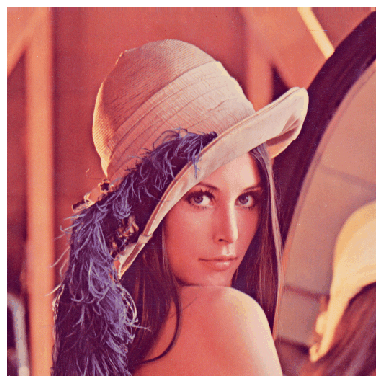

superresolution:


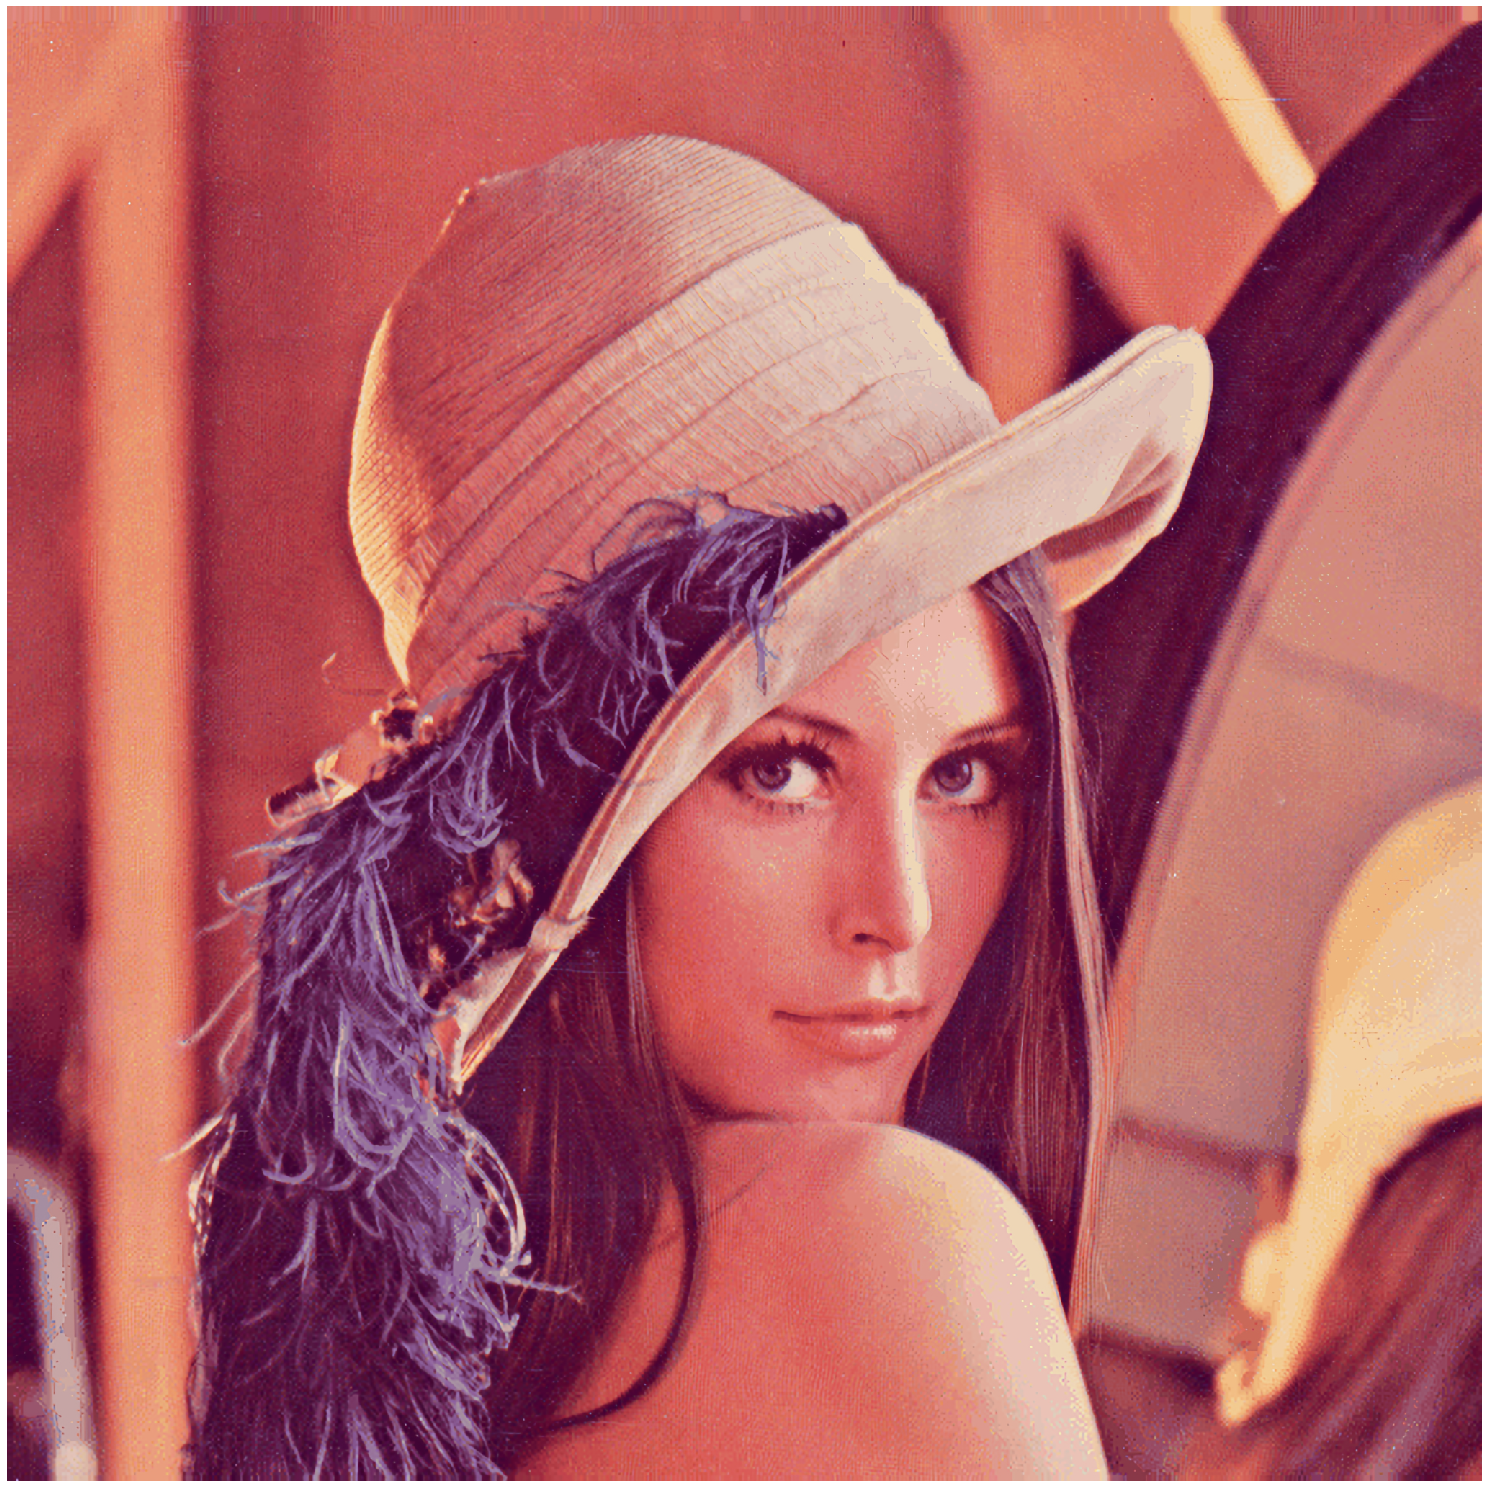

ground truth:


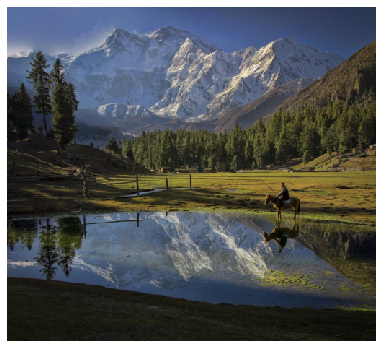

superresolution:


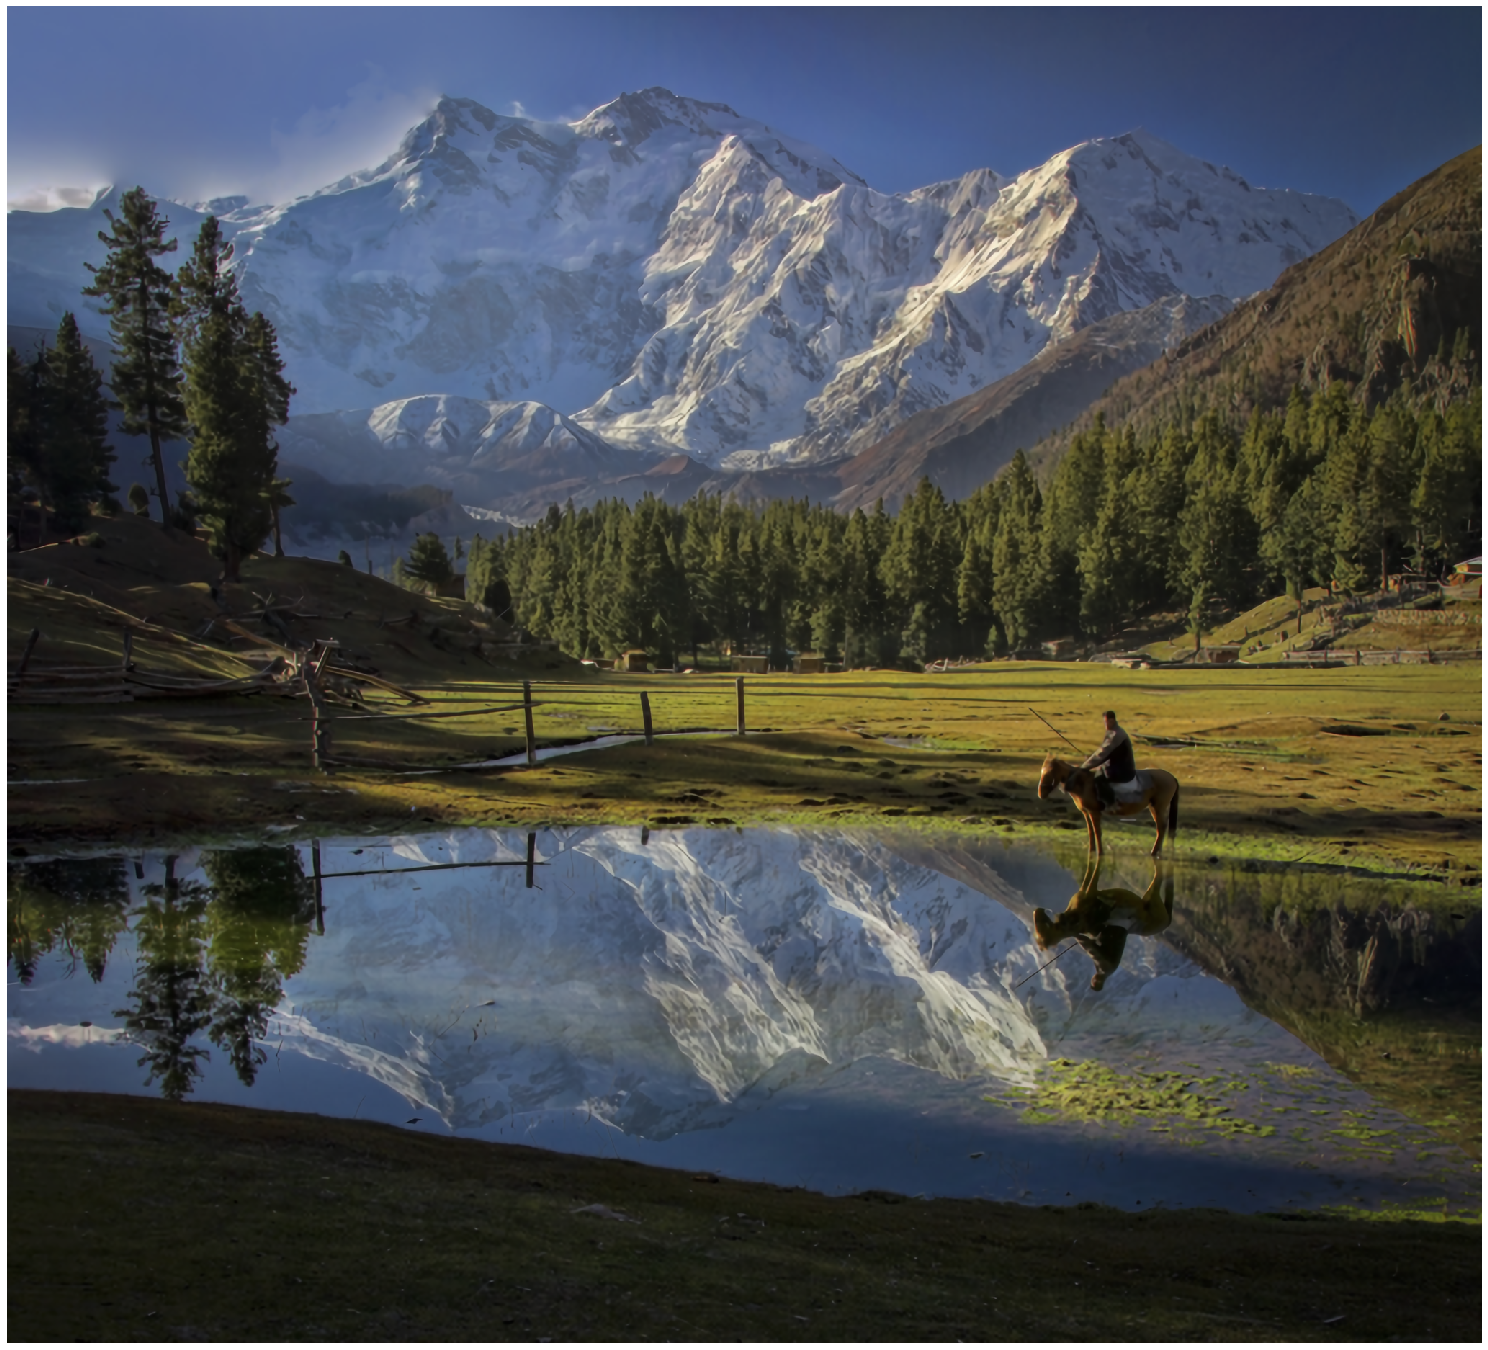

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = np.array(Image.open('./images/lenna.png'))
print('ground truth:')
display_image_in_actual_size(img.astype(np.uint8))
print('superresolution:')
superresolution = np.array(Image.open('./result/lennaX4.png'))
display_image_in_actual_size(superresolution.astype(np.uint8))
img = np.array(Image.open('./images/div2k-sample.png'))
print('ground truth:')
display_image_in_actual_size(img.astype(np.uint8))
print('superresolution:')
superresolution = np.array(Image.open('./result/div2k-sampleX4.png'))
display_image_in_actual_size(superresolution.astype(np.uint8))